<a href="https://colab.research.google.com/github/ass77/vaderNTLK/blob/master/stockVader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
#TOP TECH COMP
tickers = ['AMZN', 'AAPL' ,'GOOG','TSLA']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [32]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df['date'] = pd.to_datetime(df.date).dt.date

In [33]:
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<Figure size 720x576 with 0 Axes>

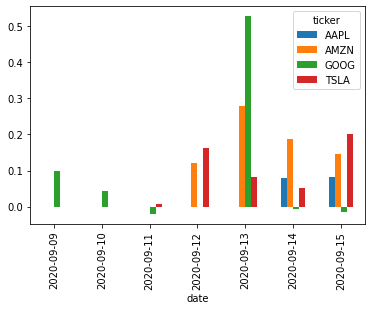

In [34]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

In [35]:
print(mean_df)

ticker          AAPL      AMZN      GOOG      TSLA
date                                              
2020-09-09       NaN       NaN  0.098667       NaN
2020-09-10       NaN       NaN  0.042290       NaN
2020-09-11       NaN       NaN -0.020144  0.008262
2020-09-12       NaN  0.120109  0.000000  0.163720
2020-09-13       NaN  0.277540  0.526700  0.081133
2020-09-14  0.078233  0.188746 -0.006204  0.051722
2020-09-15  0.083219  0.144997 -0.014918  0.200824
